In [1]:
import cv2
 
# 開啟影片檔案
cap = cv2.VideoCapture('test_dataset.avi')
wordPic = []
# 以迴圈從影片檔案讀取影格，並顯示出來
while(cap.isOpened()):
    ret, frame = cap.read()
    if not ret:
        break
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    wordPic.append(gray)
    
 
cap.release()
cv2.destroyAllWindows()
print(len(wordPic))

60000


In [5]:
import numpy as np

In [ ]:
label = np.loadtxt('label.txt', delimiter=',')
print(len(label))

In [40]:
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [25]:
wordPic = np.array(wordPic)
label = np.array(label)
X_train, X_test, y_train, y_test = train_test_split(
     wordPic, label, test_size=0.4, random_state=42)

dataset_size = len(X_train)
test_size = len(X_test)
X_train = X_train.reshape(dataset_size,-1)
X_test = X_test.reshape(test_size,-1)

In [9]:
svc = svm.SVC(gamma='scale',class_weight='balanced',C=100)

In [10]:
svc.fit(X_train,y_train)

SVC(C=100, class_weight='balanced')

In [26]:
result=svc.predict(X_test)

In [28]:
print('Accuracy :',accuracy_score(y_test,result))
print(classification_report(y_test,result))

Accuracy : 0.9805
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      2364
         1.0       0.99      0.99      0.99      2672
         2.0       0.97      0.98      0.98      2322
         3.0       0.98      0.97      0.98      2484
         4.0       0.98      0.98      0.98      2334
         5.0       0.98      0.98      0.98      2215
         6.0       0.99      0.99      0.99      2416
         7.0       0.98      0.98      0.98      2516
         8.0       0.98      0.97      0.97      2305
         9.0       0.97      0.97      0.97      2372

    accuracy                           0.98     24000
   macro avg       0.98      0.98      0.98     24000
weighted avg       0.98      0.98      0.98     24000



In [32]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
# metrics.ConfusionMatrixDisplay.from_predictions(y_test, result)
# # disp.figure_.suptitle("Confusion Matrix")
# # print(f"Confusion matrix:\n{disp.confusion_matrix}")

# # plt.show()

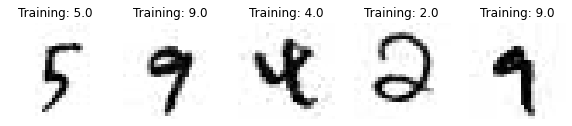

In [60]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_train, y_train):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Training: {prediction}")

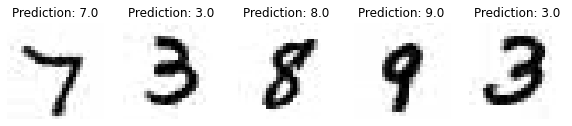

In [52]:
_, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, result):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")

In [46]:
def bHeadCal(x, y):
    xArray = np.array(x)
    yArray = np.array(y)
    antecedent = np.linalg.inv(np.dot(np.transpose(xArray), xArray))
    consequent = np.dot(np.transpose(xArray), yArray)
    x = antecedent[0][0] * consequent[0] + antecedent[0][1] * consequent[1]
    return np.dot(antecedent, consequent)

In [67]:
def predict(parmeters, b):
    return b[0] + np.dot(parmeters, b[1:])

In [3]:
fileName = "data_class.txt"
height = []
weight = []
sex = []
with open(fileName, 'r', encoding="utf-8") as f:
    for line in f.readlines():
        data = list(line.split("\t"))
        height.append([float(data[1])])
        weight.append([float(data[1])])
        if data[2] == '男\n':
            sex.append([0])
        else:
            sex.append([1])

In [36]:
inputData = []
for i in range(len(height)):
    inputData.append(np.concatenate([[1], height[i]]))
print(inputData)

[array([ 1. , 56.6]), array([ 1., 50.]), array([ 1., 62.]), array([ 1., 66.]), array([ 1., 70.]), array([ 1., 54.]), array([ 1., 62.]), array([ 1., 30.]), array([ 1., 60.]), array([ 1., 54.]), array([ 1., 58.]), array([  1., 103.]), array([ 1., 83.]), array([ 1., 65.]), array([ 1., 50.]), array([ 1., 54.]), array([ 1., 58.]), array([ 1., 60.]), array([ 1., 40.]), array([ 1., 55.]), array([ 1., 45.]), array([ 1., 90.]), array([ 1., 80.]), array([  1., 101.])]


In [49]:
from sklearn.model_selection import train_test_split

In [62]:
xFleName = "iris_x.txt"
yFleName = "iris_y.txt"

xData = []
yData = []


with open(xFleName, 'r') as f:
    for line in f.readlines():
        xData.append(list(map(float, line.split("\t")[:-1])))

with open(yFleName, 'r') as f:
    for line in f.readlines():
        yData.append(int(line[-2]))

x_train, x_test, y_train, y_test = train_test_split(
    xData, yData, test_size=0.2, random_state=20220413)

In [63]:
for array in x_train:
    array.insert(0, 1)

In [64]:
bHead = bHeadCal(x_train, y_train)

[[ 120.    694.2   365.8   436.5   136.9 ]
 [ 694.2  4097.82 2108.84 2677.61  853.21]
 [ 365.8  2108.84 1138.74 1284.68  400.37]
 [ 436.5  2677.61 1284.68 1966.23  653.58]
 [ 136.9   853.21  400.37  653.58  225.29]]
17.72089036025463


In [65]:
print(bHead.shape)
print(x_train)
print(y_train)

(5,)
[[1, 4.4, 3.0, 1.3, 0.2], [1, 5.4, 3.7, 1.5, 0.2], [1, 4.4, 2.9, 1.4, 0.2], [1, 7.7, 2.6, 6.9, 2.3], [1, 5.1, 3.5, 1.4, 0.2], [1, 5.0, 2.3, 3.3, 1.0], [1, 6.1, 2.6, 5.6, 1.4], [1, 6.3, 2.5, 5.0, 1.9], [1, 4.5, 2.3, 1.3, 0.3], [1, 7.4, 2.8, 6.1, 1.9], [1, 6.3, 2.5, 4.9, 1.5], [1, 5.6, 2.5, 3.9, 1.1], [1, 5.7, 2.5, 5.0, 2.0], [1, 5.9, 3.0, 4.2, 1.5], [1, 6.6, 2.9, 4.6, 1.3], [1, 6.1, 3.0, 4.6, 1.4], [1, 6.4, 2.7, 5.3, 1.9], [1, 4.7, 3.2, 1.3, 0.2], [1, 5.8, 2.7, 3.9, 1.2], [1, 5.0, 2.0, 3.5, 1.0], [1, 5.0, 3.3, 1.4, 0.2], [1, 4.9, 3.0, 1.4, 0.2], [1, 5.0, 3.5, 1.6, 0.6], [1, 5.7, 3.0, 4.2, 1.2], [1, 5.7, 4.4, 1.5, 0.4], [1, 6.2, 2.8, 4.8, 1.8], [1, 5.4, 3.4, 1.7, 0.2], [1, 5.4, 3.4, 1.5, 0.4], [1, 5.1, 3.4, 1.5, 0.2], [1, 5.2, 4.1, 1.5, 0.1], [1, 5.2, 2.7, 3.9, 1.4], [1, 5.1, 3.8, 1.6, 0.2], [1, 5.1, 3.5, 1.4, 0.3], [1, 6.0, 3.0, 4.8, 1.8], [1, 6.0, 2.2, 4.0, 1.0], [1, 6.5, 3.0, 5.2, 2.0], [1, 5.8, 2.8, 5.1, 2.4], [1, 4.8, 3.1, 1.6, 0.2], [1, 5.6, 2.7, 4.2, 1.3], [1, 5.1, 3.7, 1.5, 

In [66]:
print(bHead)

[ 0.05420495 -0.07565083 -0.04595657  0.21104357  0.61871881]


In [68]:
print(predict([5.1, 3.5, 1.4, 0.2], bHead))

-0.07325749008130844


In [69]:
result = []
for test in x_test:
    result.append(predict(test, bHead))

In [71]:
from sklearn.metrics import mean_squared_error

In [72]:
print("MSE:" + str(mean_squared_error(y_test, result)))

MSE:0.032088157217009666
